In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
image = cv2.imread('Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_014.png')

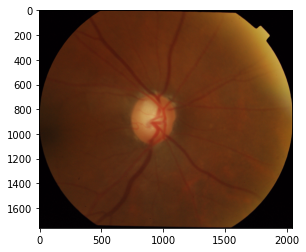

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))

In [5]:
import xlrd

In [6]:
wb = xlrd.open_workbook("Drishti-GS1_files/Drishti-GS1_diagnosis.xlsx") 
sheet = wb.sheet_by_index(0) 
val = [sheet.col_values(1)[5:],sheet.col_values(8)[5:]]

In [7]:
val

[["drishtiGS_001'",
  "drishtiGS_002'",
  "drishtiGS_003'",
  "drishtiGS_004'",
  "drishtiGS_005'",
  "drishtiGS_006'",
  "drishtiGS_007'",
  "drishtiGS_008'",
  "drishtiGS_009'",
  "drishtiGS_010'",
  "drishtiGS_011'",
  "drishtiGS_012'",
  "drishtiGS_013'",
  "drishtiGS_014'",
  "drishtiGS_015'",
  "drishtiGS_016'",
  "drishtiGS_017'",
  "drishtiGS_018'",
  "drishtiGS_019'",
  "drishtiGS_020'",
  "drishtiGS_021'",
  "drishtiGS_022'",
  "drishtiGS_023'",
  "drishtiGS_024'",
  "drishtiGS_025'",
  "drishtiGS_026'",
  "drishtiGS_027'",
  "drishtiGS_028'",
  "drishtiGS_029'",
  "drishtiGS_030'",
  "drishtiGS_031'",
  "drishtiGS_032'",
  "drishtiGS_033'",
  "drishtiGS_034'",
  "drishtiGS_035'",
  "drishtiGS_036'",
  "drishtiGS_037'",
  "drishtiGS_038'",
  "drishtiGS_039'",
  "drishtiGS_040'",
  "drishtiGS_041'",
  "drishtiGS_042'",
  "drishtiGS_043'",
  "drishtiGS_044'",
  "drishtiGS_045'",
  "drishtiGS_046'",
  "drishtiGS_047'",
  "drishtiGS_048'",
  "drishtiGS_049'",
  "drishtiGS_050'",


In [8]:
def load_image(path):
    return cv2.imread(path)

In [9]:
import sys
import os
import glob

In [10]:
#function to load image and their name
def load_set(folder, shuffle=False):
    img_list = sorted(glob.glob(os.path.join(folder, '*.png')) + \
                      glob.glob(os.path.join(folder, '*.jpg')) + \
                      glob.glob(os.path.join(folder, '*.jpeg')))
    if shuffle:
        np.random.shuffle(img_list)
    data = []
    filenames = []
    for img_fn in img_list:
        img = load_image(img_fn)
        data.append(img)
        filenames.append(img_fn)
    return data, filenames

In [11]:
#DATA EXTRACTION FUNCTION
def extract_DRISHTI_GS_train(db_folder,cdr,train_data):

    file_codes_all,exp1,exp2,exp3,exp4 = [], [], [], [], []
    if train_data:
        set_path = os.path.join(db_folder, 'Drishti-GS1_files','Drishti-GS1_files', 'Training')
    else:
        set_path = os.path.join(db_folder, 'Drishti-GS1_files','Drishti-GS1_files', 'Test')
    images_path = os.path.join(set_path, 'Images')
    X_all, file_names = load_set(images_path)
    rel_file_names = [os.path.split(fn)[-1] for fn in file_names]
    rel_file_names_wo_ext = [fn[:fn.rfind('.')] for fn in rel_file_names]
    if train_data:
        file_codes = [fn[fn.find('_'):] for fn in rel_file_names_wo_ext]
    else:
        file_codes = [fn[fn.find('_'):] for fn in rel_file_names_wo_ext]
    file_codes_all.extend(file_codes)
    
    for fn in rel_file_names_wo_ext:
        if cdr:
            if train_data:
                CDR = open(os.path.join(set_path, 'GT', fn,fn + '_cdrValues.txt'),'r')
            else:
                CDR = open(os.path.join(set_path, 'Test_GT', fn,fn + '_cdrValues.txt'),'r')
            CDR = list(CDR)
            CDR = CDR[0].split()
            exp1.append(float(CDR[0]))
            exp2.append(float(CDR[1]))
            exp3.append(float(CDR[2]))
            exp4.append(float(CDR[3]))
            
    return X_all, file_codes_all,exp1,exp2,exp3,exp4,file_names

In [12]:
# GET DATA
X_all,file_codes_all,exp1,exp2,exp3,exp4,file_names = extract_DRISHTI_GS_train('',True,False) #put the folder where dataset is

In [13]:
print(np.array(X_all).shape)
print(np.array(X_all[0]).shape)

(51,)
(1751, 2049, 3)


/home/chella/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [14]:
file_names

['Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_001.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_003.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_005.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_006.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_007.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_009.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_011.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_013.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_014.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_019.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_020.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_021.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_023.png',
 'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_025.png',
 'Drishti-GS1_files/

In [15]:
# FUNCTION TO SEGMENT CUP AND DISK
def segment(image,plot_seg,plot_hist,name):

    image = image[400:1500,400:1500,:] 

    Abo,Ago,Aro = cv2.split(image) 
    M = 100
    filter = signal.gaussian(M, std=6)
    STDf = filter.std()
    

    Ar = Aro - Aro.mean() - Aro.std() 
    Mr = Ar.mean()          
    SDr = Ar.std()                          
    Thr = 0.5*M - STDf - SDr            

    
    M = 30
    filter_cup = signal.gaussian(M, std=6) 
    STDf = filter_cup.std()  

    Ag = Ago - Ago.mean() - Ago.std()
    Mg = Ag.mean()                        
    SDg = Ag.std()                        
    Thg = 0.5*M +2*STDf + 2*SDg + Mg     
    #print(Thg)
    
    
    hist,bins = np.histogram(Ag.ravel(),256,[0,256])  
    histr,binsr = np.histogram(Ar.ravel(),256,[0,256])


    smooth_hist_g=np.convolve(filter,hist)  
    smooth_hist_r=np.convolve(filter_cup,histr) 
    
    if plot_hist:
        plt.figure(figsize = (8,8))
        plt.subplot(2, 2, 1)
        plt.plot(hist)
        plt.title("Preprocessed Green Channel")

        plt.subplot(2, 2, 2)
        plt.plot(smooth_hist_g)
        plt.title("Smoothed Histogram Green Channel")

        plt.subplot(2, 2, 3)
        plt.plot(histr)
        plt.title("Preprocessed Red Channel")

        plt.subplot(2, 2, 4)
        plt.plot(smooth_hist_r)
        plt.title("Smoothed Histogram Red Channel")

        plt.show()
    
    r,c = Ag.shape
    Dd = np.zeros(shape=(r,c)) 
    Dc = np.zeros(shape=(r,c)) 

    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                Dd[i,j]=255
            else:
                Dd[i,j]=0

    for i in range(1,r):
        for j in range(1,c):
        
            if Ag[i,j]>Thg:
                Dc[i,j]=255
            else:
                Dc[i,j]=0
    
    name = name[47:]
     
    cv2.imwrite('paper 1 results/'+name+' disk.png',Dd)
    plt.imsave('paper 1 results/'+name+' cup.png',Dc)
    
    if plot_seg:
        plt.imshow(Dd, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("Optic Disk")
        plt.show()
        
        plt.imshow(Dc, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("Optic Cup")
        plt.show()


In [16]:
# FUNCTION TO CALCULATE CDR
def cdr(cup,disc,plot):
    
    #morphological closing and opening operations
    R1 = cv2.morphologyEx(cup, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,21)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,1)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33)), iterations = 2)
    img = R3
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #Getting all possible contours in the segmented image
    cup_diameter = 0
    largest_area = 0
    el_cup = contours[0]
    if len(contours) != 0:
        for i in range(len(contours)):
            if len(contours[i]) >= 5:
                area = cv2.contourArea(contours[i]) 
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_cup = cv2.fitEllipse(contours[i])
                
    cv2.ellipse(img,el_cup,(140,60,150),3)  
    x,y,w,h = cv2.boundingRect(contours[index]) 
    cup_diameter = max(w,h) 

    #morphological closing and opening operations
    R1 = cv2.morphologyEx(disc, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,21)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,1)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33)), iterations = 1)
    r3 = cv2.morphologyEx(R3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(43,43)), iterations = 1)
    img2 = r3
    
    ret,thresh = cv2.threshold(img2,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    disk_diameter = 0
    largest_area = 0
    el_disc = el_cup
    if len(contours) != 0:
          for i in range(len(contours)):
            if len(contours[i]) >= 5:
                area = cv2.contourArea(contours[i]) 
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_disc = cv2.fitEllipse(contours[i])
                    
            cv2.ellipse(img2,el_disc,(140,60,150),10) 
            x,y,w,h = cv2.boundingRect(contours[index]) 
    disk_diameter = max(w,h)
                
    if plot:
        plt.imshow(img2, 'gray',interpolation = 'bicubic')
        plt.axis("off")
        plt.title("Optic Disk")
        plt.show()
        plt.imshow(img, 'gray')
        plt.axis("off")
        plt.title("Optic Cup")
        plt.show()
        
    if(disk_diameter == 0): return 1 
    cdr = cup_diameter/disk_diameter 
    return cdr

In [17]:
from scipy import signal

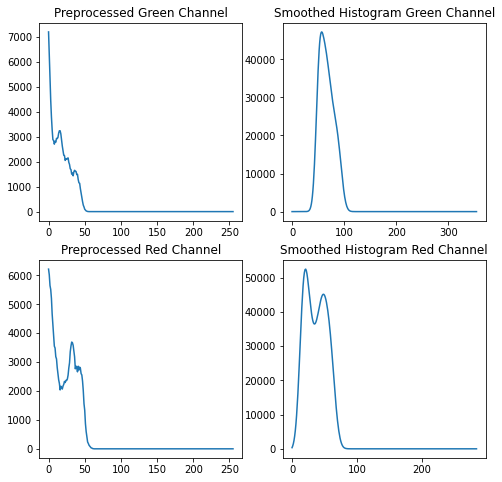

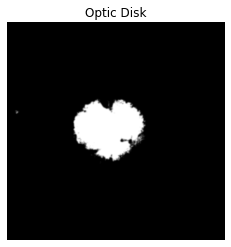

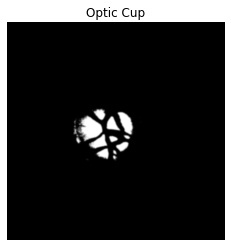

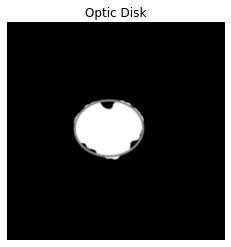

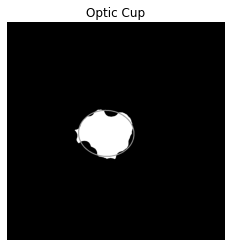

_001 Exp1_cdr: 0.85 Exp2_cdr: 0.82 Exp3_cdr: 0.8 Exp4_cdr: 0.82 Pred_cdr: 0.8323863636363636


In [18]:
# MAIN FUNCTION
CDR = [] 
VAL = [] 
count = 0
i=1
while(i):
    set_path = os.path.join('',file_names[i]) 
    image = cv2.imread(set_path,1)
    segment(image,True,True,set_path)
    name = file_names[i][47:]
    cup = cv2.imread('paper 1 results/'+name+' cup.png',0) 
    disc = cv2.imread('paper 1 results/'+name+' disk.png',0) 
    cdr_cal = cdr(cup,disc,True)
    if(val[1][int(file_codes_all[count][1:])-1] == 'Glaucomatous'):
        VAL.append(1)
    else:
        VAL.append(0)
    CDR.append(cdr_cal)
    print(file_codes_all[count],'Exp1_cdr:',exp1[count],'Exp2_cdr:',exp2[count],'Exp3_cdr:',exp3[count],'Exp4_cdr:',exp4[count],'Pred_cdr:',cdr_cal)
    count+=1
    break

In [19]:
set_path

'Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_003.png'

In [20]:
table = []

In [21]:
# MAIN FUNCTION
CDR = [] 
VAL = [] 
count = 0
for i in range(len(X_all)):
    set_path = os.path.join('',file_names[i]) 
    image = cv2.imread(set_path,1)
    segment(image,False,False,set_path)
    name = file_names[i][47:]
    cup = cv2.imread('paper 1 results/'+name+' cup.png',0) 
    disc = cv2.imread('paper 1 results/'+name+' disk.png',0) 
    cdr_cal = cdr(cup,disc,False)
    if(val[1][int(file_codes_all[count][1:])-1] == 'Glaucomatous'):
        VAL.append(1)
    else:
        VAL.append(0)
    CDR.append(cdr_cal)
    table.append([file_codes_all[count], exp1[count], exp2[count], exp3[count], exp4[count], cdr_cal])
    count+=1

In [22]:
table = pd.DataFrame(table, columns = ['File Code', 'Expert1', 'Expert2', 'Expert3', 'Expert4', 'predicted cdr'])
display(table)

,File Code,Expert1,Expert2,Expert3,Expert4,predicted cdr
0,_001,0.85,0.82,0.80,0.82,0.674107
1,_003,0.83,0.79,0.72,0.79,0.832386
2,_005,0.86,0.87,0.81,0.80,0.757225
3,_006,0.64,0.77,0.65,0.53,0.342391
4,_007,0.86,0.83,0.70,0.62,0.624079
5,_009,0.54,0.56,0.39,0.53,0.967164
6,_011,0.81,0.81,0.77,0.83,0.981884
7,_013,0.80,0.66,0.65,0.62,0.500000
8,_014,0.86,0.87,0.84,0.82,0.800570
9,_019,0.86,0.91,0.84,0.78,0.787368


In [23]:
error1,error2,error3,error4 = [],[],[],[]
for i in range(len(X_all)):
    error1.append(float(exp1[i]) - CDR[i])
    error2.append(float(exp2[i]) - CDR[i])
    error3.append(float(exp3[i]) - CDR[i])
    error4.append(float(exp4[i]) - CDR[i])

In [24]:
import pandas as pd

In [25]:
#saving the error and calculated cdr and its label into csv files for training classification model
a = pd.DataFrame(error1) 
b = pd.DataFrame(error2) 
c = pd.DataFrame(error3) 
d = pd.DataFrame(error4) 
x1 = pd.DataFrame(CDR) 
y1 = pd.DataFrame(VAL) 

In [26]:
X_all,file_codes_all,exp1,exp2,exp3,exp4,file_names = extract_DRISHTI_GS_train('',True,False) #put the folder where 
x = (np.array(exp1)+np.array(exp2)+np.array(exp3)+np.array(exp4))/4
x = pd.DataFrame(x)

In [27]:

x1.to_csv('x1.csv',index=False)
y1.to_csv('y1.csv',index=False)
x.to_csv('x.csv',index=False)
y1.to_csv('y.csv',index=False)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [29]:
logreg = LogisticRegression() 
logreg.fit(x, y1)

/home/chella/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [30]:
y_pred = logreg.predict(x1)
acc = f1_score(y1, y_pred)

In [31]:
acc

0.8636363636363636